In [2]:
# Importing the libraries
import numpy as np                         
import matplotlib.pyplot as plt               
import pandas as pd                         
from sklearn.metrics import accuracy_score    

In [4]:
# Importing the dataset
ds = pd.read_csv('wine_data.csv')
ds

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Performing Exploratory Data Analaysis

In [5]:
ds.shape 

(178, 14)

In [6]:
ds.isna().sum() 


Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [7]:
ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [37]:
ds.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
X = ds.iloc[:, 1:13].values 
X

array([[14.23,  1.71,  2.43, ...,  5.64,  1.04,  3.92],
       [13.2 ,  1.78,  2.14, ...,  4.38,  1.05,  3.4 ],
       [13.16,  2.36,  2.67, ...,  5.68,  1.03,  3.17],
       ...,
       [13.27,  4.28,  2.26, ..., 10.2 ,  0.59,  1.56],
       [13.17,  2.59,  2.37, ...,  9.3 ,  0.6 ,  1.62],
       [14.13,  4.1 ,  2.74, ...,  9.2 ,  0.61,  1.6 ]])

In [16]:
y = ds.iloc[:, 0].values 
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [17]:
#Splitting the data into x and y 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
#Feature scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train= sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 


In [20]:
#finding k value
from sklearn.neighbors import KNeighborsClassifier
acc_list = []
err_list = []
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    err = 1 - acc
    print("For k = {}, accuracy = {}, error = {}".format(i,acc, err))
    acc_list.append(acc)
    err_list.append(1-acc)

For k = 1, accuracy = 0.9166666666666666, error = 0.08333333333333337
For k = 2, accuracy = 0.9166666666666666, error = 0.08333333333333337
For k = 3, accuracy = 0.9444444444444444, error = 0.05555555555555558
For k = 4, accuracy = 0.9444444444444444, error = 0.05555555555555558
For k = 5, accuracy = 0.9444444444444444, error = 0.05555555555555558
For k = 6, accuracy = 0.9166666666666666, error = 0.08333333333333337
For k = 7, accuracy = 0.9722222222222222, error = 0.02777777777777779
For k = 8, accuracy = 0.9166666666666666, error = 0.08333333333333337
For k = 9, accuracy = 0.9444444444444444, error = 0.05555555555555558
For k = 10, accuracy = 0.8888888888888888, error = 0.11111111111111116
For k = 11, accuracy = 0.8888888888888888, error = 0.11111111111111116
For k = 12, accuracy = 0.8888888888888888, error = 0.11111111111111116
For k = 13, accuracy = 0.8888888888888888, error = 0.11111111111111116
For k = 14, accuracy = 0.8888888888888888, error = 0.11111111111111116
For k = 15, acc

In [340]:
#returning the scores
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1  0]
 [ 1 14  1]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.88      0.88      0.88        16
           2       0.83      0.83      0.83         6

    accuracy                           0.89        36
   macro avg       0.88      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36



Text(0, 0.5, 'Accuracy')

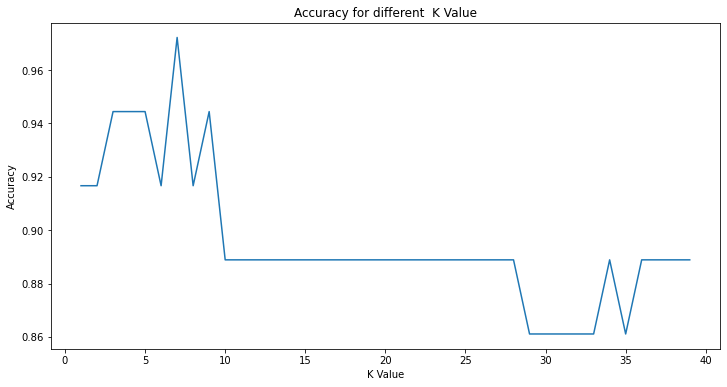

In [29]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), acc_list, markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')
plt.ylabel('Accuracy') 

Text(0, 0.5, 'Error Rate')

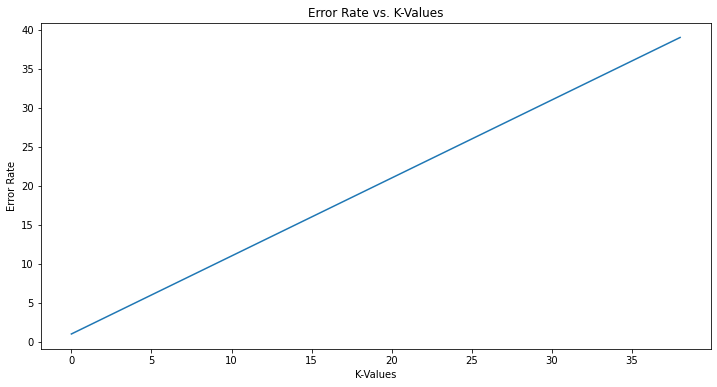

In [32]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40))
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [30]:
#building the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 1, 14,  1],
       [ 0,  0,  6]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9444444444444444